In [2]:
import pandas as pd

def process_csv_data(file_name):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_name)
    
    # Calculate the mean acceptance rate and its standard deviation for each participant
    participant_stats = df.groupby('subj_idx')['response'].agg(['mean', 'std']).rename(columns={'mean': 'mean_acceptance_rate', 'std': 'sd_acceptance_rate'})
    # Join these back onto the original dataframe
    df = df.join(participant_stats, on='subj_idx')
    
    # Calculate the mean and standard deviation of RT for accepted gambles for each participant
    rt_accept_stats = df[df['response'] == 1].groupby('subj_idx')['rt'].agg(['mean', 'std']).rename(columns={'mean': 'mean_rt_accept', 'std': 'sd_rt_accept'})
    df = df.join(rt_accept_stats, on='subj_idx')
    
    # Calculate the mean and standard deviation of RT for rejected gambles for each participant
    rt_reject_stats = df[df['response'] == 0].groupby('subj_idx')['rt'].agg(['mean', 'std']).rename(columns={'mean': 'mean_rt_reject', 'std': 'sd_rt_reject'})
    df = df.join(rt_reject_stats, on='subj_idx')
    
    # Create a tuple identifier for each gamble combination of gain and loss
    df['gamble_id'] = list(zip(df['gain'], df['loss']))
    
    # Calculate the mean acceptance rate for each unique gamble, considering all participants
    gamble_stats = df.groupby('gamble_id')['response'].agg(['mean', 'std']).rename(columns={'mean': 'mean_acceptance_gamble', 'std': 'sd_acceptance_gamble'})
    df = df.join(gamble_stats, on='gamble_id')
    
    return df

# Example usage:
# Replace 'path_to_your_csv.csv' with the actual path to your CSV file
processed_df = process_csv_data('j4.csv')  # Adjust the path as needed
processed_df2 = process_csv_data('sj4.csv')  # Adjust the path as needed



In [3]:
import pandas as pd

def process_data(df):
    # Calculate the mean acceptance rate and its standard deviation for each participant
    participant_stats = df.groupby('subj_idx')['response'].agg(['mean', 'std']).rename(columns={'mean': 'mean_acceptance_rate', 'std': 'sd_acceptance_rate'})
    df = df.join(participant_stats, on='subj_idx')
    
    # Calculate the mean and standard deviation of RT for accepted gambles for each participant
    rt_accept_stats = df[df['response'] == 1].groupby('subj_idx')['rt'].agg(['mean', 'std']).rename(columns={'mean': 'mean_rt_accept', 'std': 'sd_rt_accept'})
    df = df.join(rt_accept_stats, on='subj_idx')
    
    # Calculate the mean and standard deviation of RT for rejected gambles for each participant
    rt_reject_stats = df[df['response'] == 0].groupby('subj_idx')['rt'].agg(['mean', 'std']).rename(columns={'mean': 'mean_rt_reject', 'std': 'sd_rt_reject'})
    df = df.join(rt_reject_stats, on='subj_idx')
    
    # Create a tuple identifier for each gamble combination of gain and loss
    df['gamble_id'] = list(zip(df['gain'], df['loss']))
    
    # Calculate the mean acceptance rate for each unique gamble, considering all participants
    gamble_stats = df.groupby('gamble_id')['response'].agg(['mean', 'std']).rename(columns={'mean': 'mean_acceptance_gamble', 'std': 'sd_acceptance_gamble'})
    df = df.join(gamble_stats, on='gamble_id')
    
    return df


In [4]:
def calculate_overall_stats(df):
    # Calculate the mean and standard deviation of the 'mean_acceptance_rate' for participants
    participants_mean = df['mean_acceptance_rate'].mean()
    participants_sd = df['mean_acceptance_rate'].std()
    
    # Calculate the mean and standard deviation of the 'mean_acceptance_gamble' for gambles
    gambles_mean = df['mean_acceptance_gamble'].mean()
    gambles_sd = df['mean_acceptance_gamble'].std()
    
    # Return the results as a dictionary
    return {
        'Mean of Mean Acceptance Rate for Participants': participants_mean,
        'SD of Mean Acceptance Rate for Participants': participants_sd,
        'Mean of Mean Acceptance for Gambles': gambles_mean,
        'SD of Mean Acceptance for Gambles': gambles_sd
    }

# 
overall_stats = calculate_overall_stats(processed_df)
print(overall_stats)
overall_stats2 = calculate_overall_stats(processed_df2)
print(overall_stats2)

{'Mean of Mean Acceptance Rate for Participants': 0.29457797652319734, 'SD of Mean Acceptance Rate for Participants': 0.16749656425331247, 'Mean of Mean Acceptance for Gambles': 0.29457797652319734, 'SD of Mean Acceptance for Gambles': 0.30614058164920926}
{'Mean of Mean Acceptance Rate for Participants': 0.31470095025153716, 'SD of Mean Acceptance Rate for Participants': 0.1671345823367881, 'Mean of Mean Acceptance for Gambles': 0.31470095025153716, 'SD of Mean Acceptance for Gambles': 0.3605681894078811}


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... [Your existing functions] ...

def calculate_rt_stats(df):
    mean_rt_accept = df['mean_rt_accept'].mean()
    mean_rt_reject = df['mean_rt_reject'].mean()
    range_rt_accept = (df['mean_rt_accept'].min(), df['mean_rt_accept'].max())
    range_rt_reject = (df['mean_rt_reject'].min(), df['mean_rt_reject'].max())

    return {
        'Mean RT Accept': mean_rt_accept,
        'Mean RT Reject': mean_rt_reject,
        'Range RT Accept': range_rt_accept,
        'Range RT Reject': range_rt_reject
    }


# Example usage:
rt_stats = calculate_rt_stats(processed_df)
rt_stats2 = calculate_rt_stats(processed_df2)
print(rt_stats)
print(rt_stats2)


{'Mean RT Accept': 1.702196668813007, 'Mean RT Reject': 1.2643216243869566, 'Range RT Accept': (0.878889, 4.854757), 'Range RT Reject': (0.5687051666666666, 2.7281884375)}
{'Mean RT Accept': 5.796536959766276, 'Mean RT Reject': 2.300723332151565, 'Range RT Accept': (1.0814719222222222, 19.816055600000002), 'Range RT Reject': (0.9152771359090909, 8.379252444)}


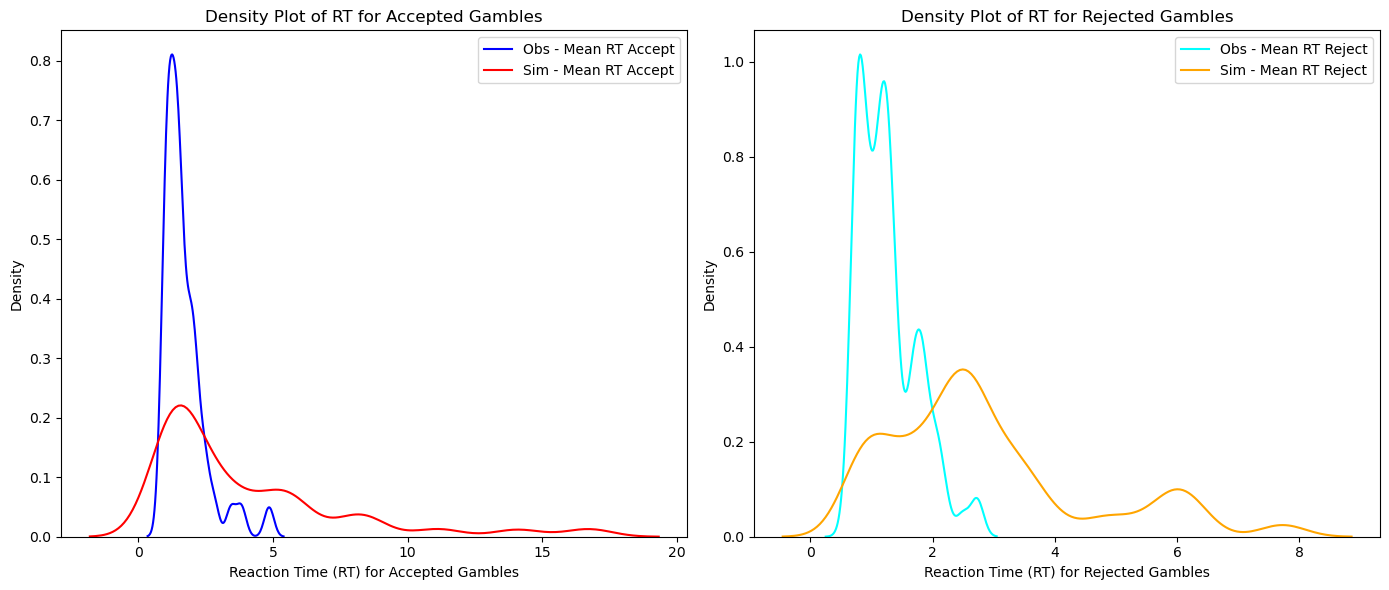

In [5]:
def plot_rt_density_graphs(df1, df2):
    plt.figure(figsize=(14, 6))

    # Plot for Mean RT Accept
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
    sns.kdeplot(df1['mean_rt_accept'], color='blue', label='Obs - Mean RT Accept')
    sns.kdeplot(df2['mean_rt_accept'], color='red', label='Sim - Mean RT Accept')
    plt.xlabel('Reaction Time (RT) for Accepted Gambles')
    plt.ylabel('Density')
    plt.title('Density Plot of RT for Accepted Gambles')
    plt.legend()

    # Plot for Mean RT Reject
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
    sns.kdeplot(df1['mean_rt_reject'], color='cyan', label='Obs - Mean RT Reject')
    sns.kdeplot(df2['mean_rt_reject'], color='orange', label='Sim - Mean RT Reject')
    plt.xlabel('Reaction Time (RT) for Rejected Gambles')
    plt.ylabel('Density')
    plt.title('Density Plot of RT for Rejected Gambles')
    plt.legend()

    plt.tight_layout()  # Adjusts the plots to fit into the figure area.
    plt.show()

# Example usage:
plot_rt_density_graphs(processed_df, processed_df2)


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

def plot_simulated_vs_observed(observed_df, simulated_df, model_name):
    # Function to calculate Pearson correlation and handle NaN values
    def calculate_pearson(x, y):
        # Remove NaN values
        clean_x = x[~(np.isnan(x) | np.isnan(y))]
        clean_y = y[~(np.isnan(x) | np.isnan(y))]
        return pearsonr(clean_x, clean_y)
    corr, _ = calculate_pearson(observed_df['mean_acceptance_rate'], simulated_df['mean_acceptance_rate'])
    corr1, _ = calculate_pearson(observed_df['mean_rt_accept'], simulated_df['mean_rt_accept'])
    return corr,corr1

# Example usage:
# Replace 'observed_df' and 'simulated_df' with your actual DataFrames.
# fig = plot_simulated_vs_observed(observed_df, simulated_df, 'YourModelName')
# plt.show() or fig.savefig('comparison_plots.png') to save the figure.


In [46]:
# obs_df = process_csv_data('j4.csv')
# sim_df = process_csv_data('sj4.csv')

# r = plot_simulated_vs_observed(obs_df, sim_df,'p1')
# type(r)
# # fig.savefig('ej1.png')

In [56]:
import hddm
import pandas as pd
import pickle
import numpy as np
import os
import ssms.basic_simulators 
from ssms.basic_simulators import simulator as sim

modelName = 'ej2'
m = hddm.load('savedModels/{}/{}'.format(modelName, modelName))
modelParamsDF = m.nodes_db
modelParamsDF.to_csv('savedModels/{}/{}_nodes.csv'.format(modelName, modelName))
# test = pd.read_csv('j4.csv')


def simulate_subject_data(subjectIndex, test, modelParamsDF):
    # Load parameters for the subject
    v_intercept = modelParamsDF.loc['v_Intercept_subj.{}'.format(subjectIndex), 'mean']
    v_gain = modelParamsDF.loc['v_gain_subj.{}'.format(subjectIndex), 'mean']
    v_loss = modelParamsDF.loc['v_loss_subj.{}'.format(subjectIndex), 'mean']
    a = modelParamsDF.loc['a_subj.{}'.format(subjectIndex), 'mean']
    z = modelParamsDF.loc['z_subj.{}'.format(subjectIndex), 'mean']
    t = modelParamsDF.loc['t_subj.{}'.format(subjectIndex), 'mean']
    
    # Filter test data for the current subject
    subject_data = test[test['subj_idx'] == subjectIndex]
    
    simulated_rts = []
    simulated_choices = []
    
    # Simulate for each trial of the subject
    for idx, row in subject_data.iterrows():
        v = v_intercept + v_gain * row['gain'] + v_loss * row['loss']
        trial_data = sim.simulator(model='ddm', theta=[v, a, z, t], n_samples=1)

        
        simulated_rts.append(trial_data['rts'][0][0])
        simulated_choices.append(trial_data['choices'][0][0])
    
    # Convert -1 choices to 0
    simulated_choices = [1 if choice == 1 else 0 for choice in simulated_choices]
    
    simulated_df = pd.DataFrame({
        'subj_idx': subjectIndex,
        'response': simulated_choices,
        'rt': simulated_rts,
        'gain': subject_data['gain'].values,
        'loss': subject_data['loss'].values
    })
    
    return simulated_df

# # x = simulate_subject_data(1, test, modelParamsDF)
# # Simulate data for all subjects
# all_subjects_test = test['subj_idx'].unique()
# sim_df= pd.concat([simulate_subject_data(subj, test, modelParamsDF) for subj in all_subjects_test], ignore_index=True)
# sim_df = process_csv_data('sj4.csv')
# r = plot_simulated_vs_observed(obs_df, sim_df,'p1')

# # fig.savefig('ej1.png')

In [67]:
obs_df = process_csv_data('j2.csv')

In [58]:
# # Simulate data for all subjects
# all_subjects_test = test['subj_idx'].unique()
# sim_df= pd.concat([simulate_subject_data(subj, test, modelParamsDF) for subj in all_subjects_test], ignore_index=True)
# sim_df = process_csv_data('sj4.csv')
# r = plot_simulated_vs_observed(obs_df, sim_df,'p1')


In [72]:
# Define a flag for the loop condition
r_greater_than_09 = False
test = process_csv_data('j2.csv')
# Loop until r > 0.90 is achieved
while not r_greater_than_09:
    # Simulate data for all subjects
    all_subjects_test = test['subj_idx'].unique()
    sim_df = pd.concat([simulate_subject_data(subj, test, modelParamsDF) for subj in all_subjects_test], ignore_index=True)
    
    # Process the simulated data
    processed_sim_df = process_data(sim_df)  # Assuming process_data is the correct function to use

    # Calculate the Pearson correlation coefficient
    r,r1 = plot_simulated_vs_observed(test, processed_sim_df, 'p1')

    # Check if r is greater than 0.9
    if r > 0.9 and r1 > 0.75:
        r_greater_than_09 = True
        print("Achieved r > 0.9")

# At this point, sim_df is the DataFrame where r > 0.9
sim_df.to_csv('sj2.csv', index=False)

Achieved r > 0.9


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

def plot_identity_line(ax, data_x, data_y):
    min_val = min(data_x.min(), data_y.min())
    max_val = max(data_x.max(), data_y.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.7, linewidth=2)

def calculate_pearson(x, y):
    clean_x = x[~(np.isnan(x) | np.isnan(y))]
    clean_y = y[~(np.isnan(x) | np.isnan(y))]
    if len(clean_x) > 1 and len(clean_y) > 1:
        return pearsonr(clean_x, clean_y)
    else:
        return (np.nan, np.nan)

def plot_mean_acceptance_rate(observed_df, simulated_df, ax, model_name):
    sns.scatterplot(x=observed_df['mean_acceptance_rate'], y=simulated_df['mean_acceptance_rate'], color='red', edgecolor='black', ax=ax)
    ax.plot([0, 1], [0, 1], linestyle='--', color='lightblue')
    corr, _ = calculate_pearson(observed_df['mean_acceptance_rate'], simulated_df['mean_acceptance_rate'])
    ax.set_title(f'Mean Acceptance Rate - Pearson r={corr:.2f} [{model_name}]')
    ax.set_xlabel('Observed')
    ax.set_ylabel('Simulated')

def plot_mean_rt_accept(observed_df, simulated_df, ax, model_name):
    sns.scatterplot(x=observed_df['mean_rt_accept'], y=simulated_df['mean_rt_accept'], color='red', edgecolor='black', ax=ax)
    plot_identity_line(ax, observed_df['mean_rt_accept'], simulated_df['mean_rt_accept'])
    corr, _ = calculate_pearson(observed_df['mean_rt_accept'], simulated_df['mean_rt_accept'])
    ax.set_title(f'Mean RT for Acceptance - Pearson r={corr:.2f} [{model_name}]')
    ax.set_xlabel('Observed')
    ax.set_ylabel('Simulated')

def plot_mean_rt_reject(observed_df, simulated_df, ax, model_name):
    sns.scatterplot(x=observed_df['mean_rt_reject'], y=simulated_df['mean_rt_reject'], color='red', edgecolor='black', ax=ax)
    plot_identity_line(ax, observed_df['mean_rt_reject'], simulated_df['mean_rt_reject'])
    corr, _ = calculate_pearson(observed_df['mean_rt_reject'], simulated_df['mean_rt_reject'])
    ax.set_title(f'Mean RT for Rejection - Pearson r={corr:.2f} [{model_name}]')
    ax.set_xlabel('Observed')
    ax.set_ylabel('Simulated')

def plot_mean_acceptance_gamble(observed_df, simulated_df, ax, model_name):
    observed_mean_gamble = observed_df.groupby('gamble_id')['mean_acceptance_gamble'].mean().dropna()
    simulated_mean_gamble = simulated_df.groupby('gamble_id')['mean_acceptance_gamble'].mean().dropna()
    sns.scatterplot(x=observed_mean_gamble, y=simulated_mean_gamble, color='red', edgecolor='black', ax=ax)
    ax.plot([0, 1], [0, 1], linestyle='--', color='lightblue')
    corr, _ = calculate_pearson(observed_mean_gamble, simulated_mean_gamble)
    ax.set_title(f'Mean Acceptance Rates for Gamble - Pearson r={corr:.2f} [{model_name}]')
    ax.set_xlabel('Observed')
    ax.set_ylabel('Simulated')



obs_df = process_csv_data('r1.csv')
sim_df = process_csv_data('sim_r1.csv') 
   
simu_df = process_data(sim_df)      
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

plot_mean_acceptance_rate(obs_df, simu_df, axes[0, 0], 'p1')
plot_mean_rt_accept(obs_df, simu_df, axes[0, 1], 'p1')
plot_mean_rt_reject(obs_df, simu_df, axes[1, 0], 'p1')
plot_mean_acceptance_gamble(obs_df, simu_df, axes[1, 1], 'p1')

plt.tight_layout()
# fig.savefig('j1.png')


ValueError: columns overlap but no suffix specified: Index(['mean_acceptance_rate', 'sd_acceptance_rate'], dtype='object')

In [ ]:
# def calculate_statistics(observed, simulated):
#     stats = {}
#     stats['mean_difference'] = (simulated - observed).mean()
#     stats['median_difference'] = (simulated - observed).median()
#     stats['effect_size'] = (simulated - observed).mean() / (simulated - observed).std()
#     stats['rmse'] = np.sqrt(((simulated - observed) ** 2).mean())
#     stats['pearson_correlation'] = pearsonr(observed, simulated)[0]
#     stats['spearman_correlation'] = spearmanr(observed, simulated)[0]
#     stats['percentage_difference'] = ((simulated - observed) / observed).mean() * 100
#     return stats

# # Example usage:
# observed_acceptance = obs_df['mean_acceptance_rate']
# simulated_acceptance = sim_df['mean_acceptance_rate']
# stats = calculate_statistics(observed_acceptance, simulated_acceptance)
# print(stats)


In [ ]:
# num_simulations = 100  # Number of simulations per trial

# # Lists to store simulated data
# simulated_rts = []
# simulated_choices = []

# # Loop over each trial
# for idx, row in subject_data.iterrows():
#     v = v_intercept + v_gain * row['gain'] + v_loss * row['loss']
#     trial_data = sim.simulator(model='ddm', theta=[v, a, z, t], n_samples=num_simulations)

#     simulated_rts.extend(trial_data['rts'][0])
#     simulated_choices.extend(trial_data['choices'][0])

# # Convert simulated_choices as needed
# simulated_choices = [1 if choice == 1 else 0 for choice in simulated_choices]

# # Create DataFrame
# simulated_df = pd.DataFrame({
#     'subj_idx': [subjectIndex] * num_simulations * len(subject_data),
#     'response': simulated_choices,
#     'rt': simulated_rts,
#     # Repeat gain and loss values for each set of simulations
#     'gain': np.repeat(subject_data['gain'].values, num_simulations),
#     'loss': np.repeat(subject_data['loss'].values, num_simulations)
# })

In [ ]:
import pandas as pd
import numpy as np
import ssms.basic_simulators 
from ssms.basic_simulators import simulator as sim

def simulate_and_aggregate(subjectIndex, test, modelParamsDF, num_simulations=100):
    """
    Simulates and aggregates data for a given subject.

    Parameters:
    subjectIndex (int): The index of the subject.
    test (pd.DataFrame): The DataFrame containing test data.
    modelParamsDF (pd.DataFrame): The DataFrame containing model parameters.
    num_simulations (int): The number of simulations per trial.

    Returns:
    pd.DataFrame: A DataFrame containing the simulated and aggregated data.
    """
    # Load parameters for the subject
    v_intercept = modelParamsDF.loc['v_Intercept_subj.{}'.format(subjectIndex), 'mean']
    v_gain = modelParamsDF.loc['v_gain_subj.{}'.format(subjectIndex), 'mean']
    v_loss = modelParamsDF.loc['v_loss_subj.{}'.format(subjectIndex), 'mean']
    a = modelParamsDF.loc['a_subj.{}'.format(subjectIndex), 'mean']
    z = modelParamsDF.loc['z_subj.{}'.format(subjectIndex), 'mean']
    t = modelParamsDF.loc['t_subj.{}'.format(subjectIndex), 'mean']
    
    # Filter test data for the current subject
    subject_data = test[test['subj_idx'] == subjectIndex]

    # Initialize lists to store data
    simulated_rts = []
    simulated_choices = []

    # Simulate for each trial of the subject
    for idx, row in subject_data.iterrows():
        v = v_intercept + v_gain * row['gain'] + v_loss * row['loss']
        trial_data = sim.simulator(model='ddm', theta=[v, a, z, t], n_samples=num_simulations)

        simulated_rts.extend(trial_data['rts'][0])
        simulated_choices.extend(trial_data['choices'][0])

    # Convert -1 choices to 0
    simulated_choices = [1 if choice == 1 else 0 for choice in simulated_choices]
    
    # Create DataFrame with simulated data
    simulated_df = pd.DataFrame({
        'subj_idx': [subjectIndex] * num_simulations * len(subject_data),
        'response': simulated_choices,
        'rt': simulated_rts,
        'gain': np.repeat(subject_data['gain'].values, num_simulations),
        'loss': np.repeat(subject_data['loss'].values, num_simulations)
    })

    # Calculate aggregate statistics
    aggregated_df = simulated_df.groupby(['subj_idx', 'gain', 'loss']).agg({
        'rt': ['mean', 'std'],
        'response': ['mean', 'std']
    }).reset_index()

    return aggregated_df


In [74]:
import hddm
import pandas as pd
import pickle
import numpy as np
import os
import ssms.basic_simulators 
from ssms.basic_simulators import simulator as sim





In [ ]:
def simulate_subject_data(subjectIndex, test, modelParamsDF, num_simulations=100):
    """
    Simulates data for a given subject.

    Parameters:
    subjectIndex (int): The index of the subject.
    test (pd.DataFrame): The DataFrame containing test data.
    modelParamsDF (pd.DataFrame): The DataFrame containing model parameters.
    num_simulations (int): The number of simulations per trial.

    Returns:
    pd.DataFrame: A DataFrame containing the simulated data.
    """
    # Load parameters for the subject
    v_intercept = modelParamsDF.loc['v_Intercept_subj.{}'.format(subjectIndex), 'mean']
    v_gain = modelParamsDF.loc['v_gain_subj.{}'.format(subjectIndex), 'mean']
    v_loss = modelParamsDF.loc['v_loss_subj.{}'.format(subjectIndex), 'mean']
    a = modelParamsDF.loc['a_subj.{}'.format(subjectIndex), 'mean']
    z = modelParamsDF.loc['z_subj.{}'.format(subjectIndex), 'mean']
    t = modelParamsDF.loc['t_subj.{}'.format(subjectIndex), 'mean']
    
    # Filter test data for the current subject
    subject_data = test[test['subj_idx'] == subjectIndex]

    # Initialize lists to store data
    simulated_rts = []
    simulated_choices = []

    # Simulate for each trial of the subject
    for idx, row in subject_data.iterrows():
        v = v_intercept + v_gain * row['gain'] + v_loss * row['loss']
        trial_data = sim.simulator(model='ddm', theta=[v, a, z, t], n_samples=num_simulations)

        simulated_rts.extend(trial_data['rts'][0])
        simulated_choices.extend(trial_data['choices'][0])

    # Convert -1 choices to 0
    simulated_choices = [1 if choice == 1 else 0 for choice in simulated_choices]
    
    # Create DataFrame with simulated data
    simulated_df = pd.DataFrame({
        'subj_idx': [subjectIndex] * num_simulations * len(subject_data),
        'response': simulated_choices,
        'rt': simulated_rts,
        'gain': np.repeat(subject_data['gain'].values, num_simulations),
        'loss': np.repeat(subject_data['loss'].values, num_simulations)
    })

    return simulated_df

In [ ]:

modelName = 'ej2'
m = hddm.load('savedModels/{}/{}'.format(modelName, modelName))
modelParamsDF = m.nodes_db
test = pd.read_csv('j2.csv')


total_subjects = 49
num_simulations_per_trial = 100

# Initialize an empty DataFrame to hold all simulated data
all_simulated_data = pd.DataFrame()

for subject_index in range(1, total_subjects + 1):
    simulated_df = simulate_subject_data(subject_index, test, modelParamsDF, num_simulations=num_simulations_per_trial)
    
    # Append the simulated data for this subject to the main DataFrame
    all_simulated_data = pd.concat([all_simulated_data, simulated_df], ignore_index=True)

# Once all subjects are processed, save the combined DataFrame to CSV
all_simulated_data.to_csv('all_simulated_data.csv', index=False)